# 1 数据预处理

## 1.1 一些基本情况的说明

In [1]:
#所使用的python版本与运行环境
import sys
print(sys.version)
print(sys.executable)

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
G:\Anaconda\python.exe


In [2]:
#所使用的部分包
import numpy as np
import pandas as pd
import sklearn
import plotnine
import matplotlib
import pycaret

In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [3]:
#所使用的包的版本
print("numpy的版本为：",np.__version__)
print("pandas的版本为：",pd.__version__)
print("sklearn的版本为:",sklearn.__version__)
print("plotnine的版本为：",plotnine.__version__)
print("matplotlib的版本为：",matplotlib.__version__)
print("pycaret的版本为：",pycaret.__version__)

numpy的版本为： 1.19.5
pandas的版本为： 1.3.3
sklearn的版本为: 0.23.2
plotnine的版本为： 0.8.0
matplotlib的版本为： 3.3.1
pycaret的版本为： 2.3.5


In [4]:
from warnings import warn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#这一部分是为了显示中文
import matplotlib.transforms as mtransforms
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from plotnine import *

In [5]:
#所使用的数据
io=r'G:/Pythontask/final_py/depression.csv'
df_origin=pd.read_csv(io,encoding='gbk')
print(df_origin.shape) #原始数据的行数与列数
df_origin.head()

(15874, 50)


id    age  sex  prov  hukou  residence  edu  occupation  \
0  11000118.0  104.0    2    11    1.0          1  0.0         4.0   
1  11000218.0  101.0    2    11    1.0          1  0.0         2.0   
2  11000318.0  100.0    2    11    1.0          1  0.0         7.0   
3  11000418.0  103.0    2    11    1.0          1  0.0         7.0   
4  11000518.0  102.0    2    11    1.0          1  9.0         2.0   

   family_economic_condition  living_expenditure  ...  b31  b32  b33  b34  \
0                        4.0                 2.0  ...  8.0  8.0  8.0  8.0   
1                        3.0                 1.0  ...  8.0  8.0  8.0  8.0   
2                        3.0                 1.0  ...  8.0  2.0  5.0  8.0   
3                        2.0                 1.0  ...  5.0  3.0  5.0  5.0   
4                        2.0                 1.0  ...  4.0  3.0  5.0  3.0   

   b35  b36  b37  b38  b39  b310  
0  8.0  8.0  8.0  8.0  8.0   2.0  
1  8.0  8.0  8.0  8.0  8.0   8.0  
2  8.0  8.0  8.0  5.0  5.0   2.0  
3  1.0  5.0  1.0  5.0  5.0   2.0  
4  8.0  5.0  3.0  4.0  4.0   3.0  

[5 rows x 50 columns]

In [6]:
#原始数据的所有列名
df_origin.columns

Index(['id', 'age', 'sex', 'prov', 'hukou', 'residence', 'edu', 'occupation',
       'family_economic_condition', 'living_expenditure', 'marriage',
       'coresidence', 'housework', 'taichi', 'squaredance', 'friends',
       'garden', 'news', 'pets', 'cards', 'tv', 'social', 'smoke', 'alcohol',
       'exercise', 'weight', 'height', 'fruit', 'vegetable', 'fish', 'nut',
       'tea', 'self_rated_health', 'disease', 'ADL1', 'ADL2', 'ADL3', 'ADL4',
       'ADL5', 'ADL6', 'b31', 'b32', 'b33', 'b34', 'b35', 'b36', 'b37', 'b38',
       'b39', 'b310'],
      dtype='object')

## 1.2 创建一个Questiondata类来对数据进行预处理

In [7]:
class RatioError(ValueError):
    """定义异常类"""
    pass

In [8]:
class Questiondata:
    """定义问卷数据类"""
    def __init__(self,df):
        self.data=df
    
    #查看某一列的不重复元素：
    def unique_data(colname):
        self.data[colname].unique()
    
    #定义一个方法用来替换变量
    def trans_data(self,dic,colname):
        for key,value in dic.items():
            key=int(key)
            self.data[colname].replace(value,key,inplace=True)
    
    #将身高和体重合成一个新的变量BMI
    def BMI(self):
        self.data['BMI']=self.data.weight/((self.data.height/100)**2)
        
    #将某一列中的缺失值全部替换成某一个特定的值
    def tran_na(self,colname,num):
        self.data[colname].fillna(num,inplace=True)
        
    #删除某一列大于某个特定值的行并输出删除的元素条数
    def drop_row(self,colname,num,inplace_type=True):
        index=self.data[self.data[colname]>=num].index
        self.data.drop(index,inplace=inplace_type)
        print("对于变量",colname," 删除的行数为：",len(index))
    
    #除了某一列，其它列均删除大于某个特定值的行并输出删除的元素条数
    def drop_row_mul(self,colnames,num,inplace_type=True):
        temp_list=list(filter(lambda x: x not in colnames,list(self.data)))
        for i in temp_list:
            self.drop_row(i,num,inplace_type)
        
    #将某几列的值相加生成一个新的变量
    def sum_col(self,col_list,newname):
        self.data[newname]=self.data[col_list].sum(axis=1)
    
    #求某一列缺失值的个数，且当缺失值个数超过1000的时候抛出警告
    def nan_num(self,colname):
        foo=self.data[colname]
        index=pd.isnull(self.data[colname])
        nan_num=len(foo[index])
        print(colname," 缺失值个数为：",nan_num)
        if nan_num>1000:
            warn("缺失值的个数超过1000了")
        
    #求除去某些列的缺失值的个数
    def nan_num_drop(self,colnames):
        temp_list=list(filter(lambda x: x not in colnames,list(self.data)))
        for i in temp_list:
            self.nan_num(i)  
    
    #删除所有的缺失值并输出删除的数据个数：
    def drop_nan_total(self):
        before=self.data.shape[0]
        self.data.dropna(inplace=True)
        after=self.data.shape[0]
        print("删除的缺失值个数为：",before-after)
    
    #利用主成分分析生成一个新的变量：
    def pca_new(self,colnames,new_name,pca_num=3):
        X=self.data.loc[:,colnames]
        model=PCA(n_components=pca_num,whiten=True)
        model.fit(X)
        components=model.components_
        explained_var=model.explained_variance_
        explained_var_ratio=model.explained_variance_ratio_
        print("各主成分的系数为：\n",components,'\n')
        print("各主成分的方差为：\n",explained_var,'\n')
        print("各主成分的方差占比为：\n",explained_var_ratio,'\n')
        if explained_var_ratio[0]<0.5:
            raise RatioError("Ratio less than 50%")
        else:
            self.data[new_name]=list(model.fit_transform(X)[:,0])
    
    #将某一列变量变成分类的：
    def cat_data(self,colname,order=True):
        self.data[colname]=pd.Categorical(self.data[colname],ordered=order) 
        
    #将除了某些列之外的列变成分类的：
    def cat_data_mult(self,colnames,order=False):
        temp_list=list(filter(lambda x: x not in colnames,list(self.data)))
        for i in temp_list:
            self.cat_data(i,order)  

## 1.3 数据的替换与类别的整合

In [9]:
#实例化
CLHLS=Questiondata(df_origin)

In [10]:
#变量替换与整合
#将性别整合成两个水平，1为男性，0为女性
base_dic={'0':2}
CLHLS.trans_data(base_dic,colname='sex')

#将省份整合成4个水平
prov_dic={'1':[11,12,14,13,21,22,23,61],
          '2':[31,32,33,34,35,36,37],
          '3':[41,42,43],
          '4':[44,45,46,50,51]}
CLHLS.trans_data(prov_dic,colname='prov')

#将户口整合成两个水平，1为城市，0为农村
CLHLS.trans_data(base_dic,colname='hukou')

#将教育水平整合成3个水平，1为初等水平，2为中等水平，3为高等水平
edu_dic={'2':list(range(1,7)),
         '3':list(range(7,88)),
         '1':0}
CLHLS.trans_data(edu_dic,colname='edu')

#将职业整合成2个水平
occupation_dic={'1':[0,1],
           '0':list(range(2,9))}
CLHLS.trans_data(occupation_dic,colname='occupation')
CLHLS.tran_na('occupation',0)

#将生活支出整合成2个水平
CLHLS.trans_data(base_dic,colname='living_expenditure')

#将婚姻状况整合成2个水平
mar_dic={'0':list(range(2,6))+[8]}
CLHLS.trans_data(mar_dic,colname='marriage')

#将社会活动整个成3个水平
act_dic={'2':[2,3,4],
        '3':1,
        '1':5}
for i in ['housework','taichi','squaredance','friends','garden','news','pets','cards','tv','social']:
    CLHLS.trans_data(act_dic,colname=i)
    
#将吸烟、饮酒、锻炼整合成2个水平
base_dic={'0':2}
for i in ['smoke','alcohol','exercise']:
    CLHLS.trans_data(base_dic,colname=i)
    
#将身高和体重合成一个新的变量BMI
CLHLS.BMI()

#将水果、蔬菜合成两个水平，1为经常吃，0为偶尔或者很少
fruit_dic={'0':list(range(2,5))}
for i in ['fruit','vegetable']:
    CLHLS.trans_data(fruit_dic,colname=i)

#将鱼和坚果合成两个水平，1为经常吃，0为偶尔或者很少
fish_dic={'1':[1,2],
          '0':list(range(3,6))}
for i in ['fish','nut']:
    CLHLS.trans_data(fish_dic,colname=i)
    
#将茶整合成10个水平，将所有的缺失值替换成10不喝茶
CLHLS.tran_na('tea',10)

#将健康自评整合成2个水平
health_dic={'1':[1,2],
           '0':[3,4,5]}
CLHLS.trans_data(health_dic,colname='self_rated_health')

#将疾病整合成3个水平，1为有慢性病，2为其它疾病，3为没有疾病
disease1=[-2,3,4,5,11,14,17,19,20,24]
disease2=list(filter(lambda x: x not in disease1+[1,2],list(range(-2,26))))
disease_dic={'-2':2,
             '-1':1,
            '1':disease1,
            '2':disease2}
CLHLS.trans_data(disease_dic,colname='disease')
CLHLS.tran_na('disease',3)

#将生活能力整合成2类，1为不需要他人帮助，0为需要他人帮助
ADL_dic={'0':[2,3]}
for i in ["ADL"+str(x) for x in range(1,7)]:
    CLHLS.trans_data(ADL_dic,colname=i)
    
#将抑郁量表重新进行度量，重新整合成3个等级的分数
dep1_dic={'0':[1],'1':[2,3],'2':4,'3':5}
positive=['b35','b37','b310']
for i in positive:
    CLHLS.trans_data(dep1_dic,colname=i)
    
dep2_dic={'-1':1,'0':5,'1':[3,4],'3':[-1]}
negative=list(filter(lambda x: x not in positive,["b3"+str(x) for x in range(1,11)]))
for i in negative:
    CLHLS.trans_data(dep2_dic,colname=i)

## 1.4 对于缺失值的处理

由于我们的分析目标是看老年人的各种活动与其抑郁程度的关系，因此那些抑郁程度有缺失值的样本我们必须进行删除。

In [11]:
#删除所有关于抑郁程度单项问题中得分大于等于8的行
depression_list=["b3"+str(x) for x in range(1,11)]
for i in depression_list:
    CLHLS.drop_row(i,8)

对于变量 b31  删除的行数为： 1722
对于变量 b32  删除的行数为： 379
对于变量 b33  删除的行数为： 120
对于变量 b34  删除的行数为： 104
对于变量 b35  删除的行数为： 371
对于变量 b36  删除的行数为： 36
对于变量 b37  删除的行数为： 313
对于变量 b38  删除的行数为： 30
对于变量 b39  删除的行数为： 48
对于变量 b310  删除的行数为： 6


另外，一般情况下变量（除了id,年龄，身高，体重BMI，以及饮茶）中等于8（或者88）的为“不知道”，等于9（或者99）的为“缺失”，由于这些缺失值不多，我们也可以将其删除。

In [12]:
#删除基本的变量中得分大于等于8的行
CLHLS.drop_row_mul(['tea','age','id','weight','height','BMI']+depression_list,8,inplace_type=True)

对于变量 sex  删除的行数为： 0
对于变量 prov  删除的行数为： 0
对于变量 hukou  删除的行数为： 0
对于变量 residence  删除的行数为： 0
对于变量 edu  删除的行数为： 18
对于变量 occupation  删除的行数为： 0
对于变量 family_economic_condition  删除的行数为： 22
对于变量 living_expenditure  删除的行数为： 0
对于变量 marriage  删除的行数为： 2
对于变量 coresidence  删除的行数为： 0
对于变量 housework  删除的行数为： 1
对于变量 taichi  删除的行数为： 1
对于变量 squaredance  删除的行数为： 1
对于变量 friends  删除的行数为： 0
对于变量 garden  删除的行数为： 1
对于变量 news  删除的行数为： 4
对于变量 pets  删除的行数为： 2
对于变量 cards  删除的行数为： 0
对于变量 tv  删除的行数为： 2
对于变量 social  删除的行数为： 3
对于变量 smoke  删除的行数为： 0
对于变量 alcohol  删除的行数为： 1
对于变量 exercise  删除的行数为： 1
对于变量 fruit  删除的行数为： 1
对于变量 vegetable  删除的行数为： 1
对于变量 fish  删除的行数为： 0
对于变量 nut  删除的行数为： 2
对于变量 self_rated_health  删除的行数为： 11
对于变量 disease  删除的行数为： 41
对于变量 ADL1  删除的行数为： 1
对于变量 ADL2  删除的行数为： 5
对于变量 ADL3  删除的行数为： 1
对于变量 ADL4  删除的行数为： 1
对于变量 ADL5  删除的行数为： 0
对于变量 ADL6  删除的行数为： 0


In [13]:
BMI_list=['weight','height']
for i in BMI_list:
    CLHLS.drop_row(i,500)

对于变量 weight  删除的行数为： 311
对于变量 height  删除的行数为： 119


现在我们的缺失值只剩下了nan项，我们需要看一下它们在每个变量中的分布情况，如果数量不多且对数据整体没有影响，我们可以直接删除，如果有特殊情况我们需要按需处理。因此这里在类的nan_num_drop方法中我们设置了警告，当缺失的样本个数超过1000的时候就会抛出警告。

In [14]:
#为了方便后续对于数据的重新分析，我们这里将至此处理的数据保存到一个暂时的新questiondata实例中
temp_CLHLS=Questiondata(CLHLS.data.copy())
temp_CLHLS.data.drop('edu',axis=1, inplace=True)

In [15]:
#查看除了抑郁程度的所有列中缺失值的个数
CLHLS.nan_num_drop(depression_list)
#temp_CLHLS.nan_num_drop(depression_list)

id  缺失值个数为： 0
age  缺失值个数为： 8
sex  缺失值个数为： 0
prov  缺失值个数为： 0
hukou  缺失值个数为： 136
residence  缺失值个数为： 0
edu  缺失值个数为： 1846
occupation  缺失值个数为： 0
family_economic_condition  缺失值个数为： 180
living_expenditure  缺失值个数为： 180
marriage  缺失值个数为： 221
coresidence  缺失值个数为： 272
housework  缺失值个数为： 150
taichi  缺失值个数为： 182
squaredance  缺失值个数为： 179
friends  缺失值个数为： 174
garden  缺失值个数为： 143
news  缺失值个数为： 139
pets  缺失值个数为： 147
cards  缺失值个数为： 138
tv  缺失值个数为： 138
social  缺失值个数为： 237
smoke  缺失值个数为： 225
alcohol  缺失值个数为： 293
exercise  缺失值个数为： 275
weight  缺失值个数为： 144
height  缺失值个数为： 156
fruit  缺失值个数为： 126
vegetable  缺失值个数为： 120
fish  缺失值个数为： 240
nut  缺失值个数为： 258
tea  缺失值个数为： 0
self_rated_health  缺失值个数为： 130
disease  缺失值个数为： 0
ADL1  缺失值个数为： 156
ADL2  缺失值个数为： 207
ADL3  缺失值个数为： 145
ADL4  缺失值个数为： 205
ADL5  缺失值个数为： 155
ADL6  缺失值个数为： 376
BMI  缺失值个数为： 170


G:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: UserWarning: 缺失值的个数超过1000了


- 包含教育变量的时候抛出了警告，可以看出缺失值最多的变量为教育。但是由于教育水平暂无合适的填补方法，我们只能暂时先将教育这个变量进行删除。在后续的分析中，如果教育水平这个变量没有特别重要的作用我们可以将其删除，然后将分析步骤重复一遍。这也是为什么我们之前定义一个新实例的意义所在。

In [16]:
CLHLS.drop_nan_total()
#temp_CLHLS.drop_nan_total()

删除的缺失值个数为： 3226


In [17]:
#删去了全部的缺失值之后现在数据的维数
CLHLS.data.shape
#temp_CLHLS.data.shape

(8966, 51)

## 1.5 增添新的变量

In [18]:
#对抑郁程度生成一个新的得分变量
col_list=["b3"+str(x) for x in range(1,11)]
CLHLS.sum_col(col_list,newname='depression')
#temp_CLHLS.sum_col(col_list,newname='depression')

In [19]:
#主成分分析
name_list=["occupation","family_economic_condition","living_expenditure"]
CLHLS.pca_new(colnames=name_list,pca_num=3,new_name='social_eco')
#temp_CLHLS.pca_new(colnames=name_list,pca_num=3,new_name='social_eco')

各主成分的系数为：
 [[-0.13191745  0.95746645 -0.25662382]
 [ 0.99027107  0.1157275  -0.07726812]
 [-0.0442832  -0.26432016 -0.9634178 ]] 

各主成分的方差为：
 [0.43293479 0.10130739 0.08991079] 

各主成分的方差占比为：
 [0.69363572 0.1623118  0.14405248] 



这里我们参考了文献的一般研究方法，想利用PCA构建一个“经济水平”变量。从PCA的结果可以看出，第一个主成分解释了方差的近70\%，而且其构成也是很有参考意义的——这个主成分得分越高，说明经济水平越低：因为我们将“职业”这个变量重新定义为0为非白领，1为白领；家庭经济条件则是分成了5个得分——得分越低说明越富有，越高说明越穷；生活支出的0则是意味着收入不能满足基本生活需求，1为收入能满足基本生活需求。

## 1.6 改变变量类型

In [20]:
#改变需要将数据变成有序变量的列
order_list=['edu','family_economic_condition']+['housework','taichi','squaredance','friends','garden','news','pets','cards','tv','social']+["b3"+str(x) for x in range(1,11)]
for i in order_list:
    #temp_CLHLS.cat_data(i)
    CLHLS.cat_data(i)


#改变不需要将数据变成有序变量的列
norder_exp_list=order_list+['id','age','social_eco','weight','height','BMI','depression']
CLHLS.cat_data_mult(norder_exp_list)
#temp_CLHLS.cat_data_mult(norder_exp_list)

In [21]:
#print(CLHLS.data.dtypes)
#print(temp_CLHLS.data.dtypes)

到这里，我们的数据预处理部分总算是告一段落。接下来我们进入对于数据的分析部分。

# 2 数据探索性分析

In [22]:
#首先把数据先复制到一个新的数据框中
df=CLHLS.data.copy()

## 2.1 一些简单的描述性统计

### 2.1.1 核密度估计图
用来看抑郁程度的分布情况

In [23]:
#忽略所有的警告
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
df1=df[['age','depression','sex']]
df1.head()

age  depression sex
3   103.0         2.0   0
5   102.0         8.0   0
6   100.0         7.0   1
9   100.0         9.0   1
10  100.0        14.0   1

In [25]:
df1['sex'].replace(0,'女性',inplace=True)
df1['sex'].replace(1,'男性',inplace=True)
df1['sex']=pd.Categorical(df1['sex'],ordered=False) 

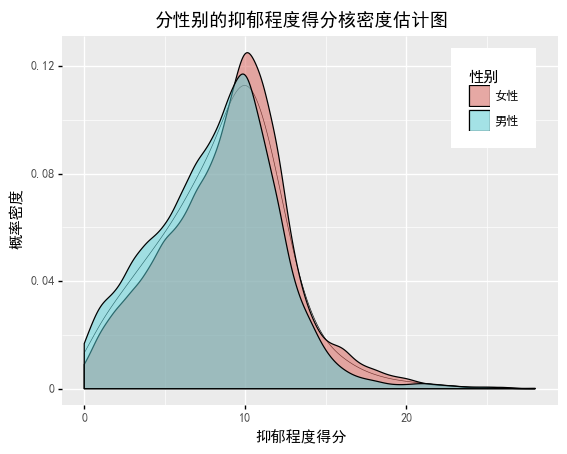

<ggplot: (-9223371880262628020)>

In [26]:
kernel=(
    ggplot(df1)
    +geom_density(aes(x='depression'),
                  bw=1,alpha=1,color='k',size=0.25)
    +geom_density(aes(x='depression',fill='sex'),
                 alpha=0.5)
    #+scale_fill_hue(s=0.9,l=0.65,h=0.04,color_space='husl')
    +scale_fill_discrete()
    +theme(text=element_text(family="SimHei"),
           legend_position=(0.8,0.75))
    +labs(fill='性别',x='抑郁程度得分',y='概率密度',title='分性别的抑郁程度得分核密度估计图') 
    
)
kernel

In [27]:
kernel.save(filename ='kernel.png', height=5, width=5, units = 'in', dpi=1000)

### 2.1.2 甜甜圈图

In [28]:
#定义函数让原数据框根据某一列生成新的一列
def add_col(data,colname,num):
    data.loc[:,colname]=1
    data.loc[:,colname][data.depression<num]=0
    
    return(data)

df1=add_col(df1,'score9',9)
df1=add_col(df1,'score10',10)
df1=add_col(df1,'score11',11)
df1.head()

age  depression sex  score9  score10  score11
3   103.0         2.0  女性       0        0        0
5   102.0         8.0  女性       0        0        0
6   100.0         7.0  男性       0        0        0
9   100.0         9.0  男性       1        0        0
10  100.0        14.0  男性       1        1        1

In [29]:
#定义函数统计特定的值
def count_unique(data,colnames):
    k=1
    
    for i in colnames:
        l=data[i].value_counts()
        temp=pd.DataFrame(l,columns=[i])
        if k==1:
            foo=temp
            k +=1
        else:
            foo=pd.concat([foo,temp],axis=1)
      
    return foo

pie_df=count_unique(df1,['score9','score10','score11'])

<Figure size 864x864 with 0 Axes>

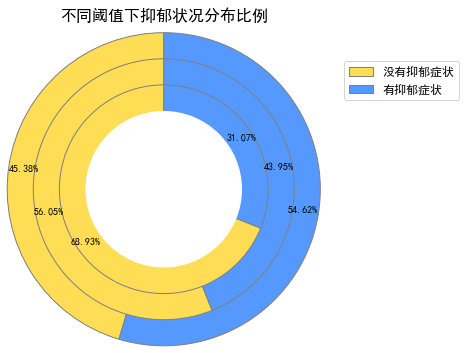

In [30]:
#定一个用来画甜甜圈图的函数，这个函数的输入是标签、颜色、以及数据框
#数据框的每一列是一个圈的数据
def loop(labels,colors,data,title="不同阈值下抑郁状况分布比例"):
    plt.figure(figsize=(12,12))
    fig,ax=plt.subplots()
    
    num=data.shape[0]
    list0=[1]+[0]*(num-1) #用于显示空心

    k=data.shape[1] #统计数据框的列数
    for i in list(range(k)):
        rate=data.iloc[:,i]
        foo=ax.pie(rate,startangle=90,radius=1.8-i*0.3,
                   pctdistance = 0.9,colors=colors,autopct='%.2f%%' 
                   )
        for pie_wedge in foo[0]:
            pie_wedge.set_edgecolor('gray')
            
    pie_0 = ax.pie(list0, radius=1.8-k*0.3,colors = 'w')
    
    plt.title(title,fontsize=16,pad=60) #pad用于设置标题与图片的距离
    ax.legend(labels,bbox_to_anchor=(1.3,1.0),loc='center left',
              prop={'size':12})
    return fig

labels=['没有抑郁症状','有抑郁症状'] #标签
colors=["#FFDD55","#5599FF"] #颜色
loop1=loop(labels,colors,pie_df)

In [32]:
loop1.savefig('loop.png')

## 2.2 变量的重要性选择

### 2.2.1 数据处理

In [33]:
df=CLHLS.data.copy()
#添加以10为阈值的得分列
df=add_col(df,'score',10) 
#删除一些不必要的列
df.drop(labels=['id','weight','height','depression',
                'occupation','family_economic_condition','living_expenditure']+["b3"+str(x) for x in range(1,11)],axis=1, inplace=True)
df_impo=df.copy()
#为了方便后续的可视化，我们把部分列名变成中文
df_impo=df_impo.rename(columns={"age":"年龄","sex":"性别","prov":"省份","hukou":"户口","residence":"居住地","edu":"教育",
                        "marriage":"婚姻","coresidence":"共同居住","housework":"做家务","taichi":"打太极拳","squaredance":"跳广场舞","friends":"会见朋友",
                        "garden":"园艺","news":"读书看报","pets":"宠物","cards":"打牌或打麻将","tv":"看电视","social":"参与社会活动",
                        "smoke":"吸烟","alcohol":"饮酒","exercise":"锻炼","fruit":"水果","vegetable":"蔬菜","fish":"鱼",
                        "nut":"坚果","self_rated_health":"健康自评","disease":"慢性病","social_eco":"贫困程度","score":"抑郁得分","tea":"茶"
                       })
df_impo.head()

年龄 性别 省份   户口 居住地   教育   婚姻 共同居住  做家务 打太极拳  ...  慢性病 ADL1 ADL2 ADL3  \
3   103.0  0  1  1.0   1  1.0  0.0  1.0  1.0  1.0  ...  3.0  0.0  1.0  1.0   
5   102.0  0  1  1.0   1  1.0  0.0  1.0  1.0  1.0  ...  3.0  0.0  0.0  0.0   
6   100.0  1  1  1.0   1  3.0  1.0  1.0  1.0  1.0  ...  2.0  0.0  1.0  1.0   
9   100.0  1  1  1.0   1  3.0  0.0  1.0  1.0  1.0  ...  1.0  0.0  0.0  0.0   
10  100.0  1  1  1.0   1  2.0  0.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

   ADL4 ADL5 ADL6        BMI      贫困程度 抑郁得分  
3   1.0  1.0  1.0  25.149640 -1.299692    0  
5   0.0  1.0  0.0  26.575379  0.155474    0  
6   1.0  1.0  1.0  22.857143 -1.500181    0  
9   1.0  1.0  1.0  24.489796 -0.045015    0  
10  1.0  1.0  1.0  19.003908  0.155474    1  

[5 rows x 37 columns]

pycaret这个包对于缺失值是敏感的，但由于我们在先前的数据预处理过程中已经将所有的缺失值都过滤掉了，这里的处理就变得非常方便。pycaret中的classification模块默认将数据划分为7:3的训练集与数据集，交叉验证默认为10折。

### 2.2.2 模型比较与选择

In [34]:
from pycaret.classification import *

In [35]:
model1=setup(data=df_impo,target='抑郁得分',session_id=123,silent = True,verbose=False) 
model_name=pd.DataFrame(models().Name).index
compare_models(include=list(model_name),sort='AUC')

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
method=['gbc','ada','rf','et','lightgbm','lr','lda']  

选择AUC的阈值在0.7以上的模型，朴素贝叶斯虽然在其它指标上表现较为优异，但这种方法在pycaret包中没有指标可供我们去衡量变量的重要性，因此我们没有将它纳入考虑，SVM - Radial Kernel这个方法没有被纳入也是出于同样的原因。

In [41]:
#定义函数根据不同的模型输出变量的重要性水平
def importance_order(method):
    for i in range(len(method)):
        model=create_model(method[i],verbose=False)
        
        try:
            model.feature_importances_
        except AttributeError:
            value=model.coef_.flatten() #将二维数组转化成一维数组
        else:
            value=model.feature_importances_ 
    
        tb1=pd.DataFrame({'Feature': get_config('X_train').columns,
                          'Value': value}).sort_values(by='Value', ascending=False)
        tb1.insert(0,method[i],np.arange(1,tb1.shape[0]+1,1),allow_duplicates=False)
        
        if i==0:
            tb=tb1
        else:
            tb=pd.merge(tb,tb1,left_on=method[i-1],right_on=method[i],suffixes=['_'+method[i-1],'_'+method[i]])
                          
    return tb

In [42]:
order_df=importance_order(method)
order_df.head(15)

gbc Feature_gbc  Value_gbc  ada Feature_ada  Value_ada  rf Feature_rf  \
0     1    健康自评_1.0   0.307861    1         BMI       0.30   1        BMI   
1     2        贫困程度   0.095665    2        贫困程度       0.10   2         年龄   
2     3         BMI   0.089872    3          年龄       0.06   3   健康自评_1.0   
3     4      蔬菜_1.0   0.053042    4    健康自评_1.0       0.04   4       贫困程度   
4     5     看电视_3.0   0.049091    5     看电视_3.0       0.04   5     蔬菜_1.0   
5     6        省份_1   0.037468    6      饮酒_0.0       0.02   6      鱼_1.0   
6     7      园艺_3.0   0.033410    7      宠物_1.0       0.02   7       省份_2   
7     8          年龄   0.032201    8  打牌或打麻将_3.0       0.02   8     锻炼_1.0   
8     9    共同居住_1.0   0.028917    9     看电视_1.0       0.02   9       性别_1   
9    10      锻炼_1.0   0.028272   10     看电视_2.0       0.02  10     婚姻_0.0   
10   11        省份_2   0.019967   11      锻炼_1.0       0.02  11   会见朋友_2.0   
11   12      婚姻_0.0   0.016581   12     做家务_3.0       0.02  12       省份_4   
12   13      教育_1.0   0.015856   13      蔬菜_1.0       0.02  13    看电视_3.0   
13   14      坚果_1.0   0.015302   14       鱼_1.0       0.02  14      居住地_2   
14   15       鱼_1.0   0.011397   15      坚果_1.0       0.02  15      居住地_3   

    Value_rf  et  ...  Value_et  lightgbm  Feature_lightgbm Value_lightgbm  \
0   0.097932   1  ...  0.059301         1               BMI            599   
1   0.084671   2  ...  0.049901         2                年龄            377   
2   0.056857   3  ...  0.047179         3              贫困程度            186   
3   0.050511   4  ...  0.039198         4          健康自评_1.0             69   
4   0.021988   5  ...  0.025186         5            蔬菜_1.0             69   
5   0.020425   6  ...  0.023493         6             鱼_1.0             67   
6   0.018316   7  ...  0.021039         7              省份_2             61   
7   0.017906   8  ...  0.020610         8             居住地_3             58   
8   0.017509   9  ...  0.020043         9            锻炼_1.0             57   
9   0.017195  10  ...  0.019311        10              性别_1             54   
10  0.016291  11  ...  0.018836        11            婚姻_0.0             51   
11  0.015909  12  ...  0.017994        12            坚果_1.0             45   
12  0.015620  13  ...  0.017975        13            茶_10.0             45   
13  0.015527  14  ...  0.017885        14          会见朋友_3.0             44   
14  0.015525  15  ...  0.017743        15              省份_1             44   

    lr  Feature_lr  Value_lr  lda     Feature     Value  
0    1       茶_3.0  0.465072    1       茶_3.0  0.360383  
1    2        省份_2  0.266819    2    共同居住_3.0  0.333081  
2    3    共同居住_3.0  0.263125    3      宠物_2.0  0.226744  
3    4       鱼_1.0  0.224309    4       鱼_1.0  0.223512  
4    5        贫困程度  0.222552    5     看电视_1.0  0.219894  
5    6     看电视_1.0  0.208700    6        贫困程度  0.216466  
6    7      茶_10.0  0.191148    7    ADL6_0.0  0.203347  
7    8      宠物_2.0  0.187837    8      饮酒_0.0  0.187386  
8    9      饮酒_0.0  0.186077    9      婚姻_0.0  0.176855  
9   10    ADL6_0.0  0.178078   10        省份_2  0.167249  
10  11      婚姻_0.0  0.175081   11    共同居住_2.0  0.146646  
11  12      园艺_1.0  0.157990   12  参与社会活动_3.0  0.130676  
12  13        省份_4  0.151324   13      园艺_1.0  0.125405  
13  14  打牌或打麻将_1.0  0.148429   14      园艺_2.0  0.110836  
14  15      园艺_2.0  0.147893   15    打太极拳_3.0  0.095945  

[15 rows x 21 columns]

In [43]:
#重要性的画图函数
def importance_plot(data,top=15,method=method):
    df=data.iloc[:top,:]
    col_name=list(df)
    for i in np.arange(0,df.shape[1],3):
        df.iloc[:,i]=col_name[i]
        
    for i in np.arange(0,df.shape[1],3):
        foo=df.iloc[:,i:i+3]
        foo.columns=['method','feature','value']
        foo= foo.sort_values(by='value', ascending=True)
        foo['feature']=pd.Categorical(foo['feature'],categories=foo['feature'],ordered=True)
    
        if i==0:
            df_trans=foo
        else:
            df_trans=pd.concat([df_trans,foo],axis=0)
    
    for i in range(len(method)):
        data_plot=df_trans.loc[df_trans['method']==method[i]]
        data_plot = data_plot.sort_values(by='value', ascending=True)
        data_plot['feature']=pd.Categorical( data_plot['feature'],categories= data_plot['feature'],ordered=True)
        
        fg=(
        ggplot(data_plot,aes('value','feature'))
        +geom_segment(aes(x=0,xend='value',y='feature',yend='feature'))
        +geom_point(shape='o',size=3,color='k',fill='blue')
        +theme(text=element_text(family="SimHei")) 
        +labs(y='变量名称', x='重要性水平', title=method[i])
        )
    
        fg.save(filename =method[i]+'_.png', height=5, width=5, units = 'in', dpi=1000)

In [44]:
importance_plot(order_df,top=15,method=method)